In [4]:
'''
RandomForestClassifier
'''

from sklearn.ensemble import RandomForestClassifier # RM object
from sklearn.model_selection import train_test_split # train/test set 
from sklearn.datasets import load_wine # data set
from sklearn import metrics # 분류정확도, 평가 report
import matplotlib.pyplot as plt # 중요변수 시각화 

# 1. dataset load
wine=load_wine()
print(wine.feature_names,"\n") # x변수명

X,y=wine.data,wine.target
X.shape
y.shape

# data 보기 
print(X[:5,:],"\n")   # 앞부분 5개 관측치
print(X[-5:,:],"\n")  # 뒷부분 5개 관측치
print(y[:5],y[-5:]) # [0 0 0 0 0] [2 2 2 2 2] class3(0,1,2)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]] 

[[1.371e+01 5.650e+00 2.450e+00 2.050e+01 9.500e+01 1.680e+00 6.100e-01
  5.200e-01 1.060e+00 7.700e+00 6.400e

In [6]:
# 2. RM model
rfc = RandomForestClassifier() # default
model = rfc.fit(X,y) # full dataset 적용 
model
'''
criterion='gini' : 노드 불순도 - 중요변수 선정기준 
max_features='auto' : 최대 사용할 x변수 개수 
n_estimators=10 : 트리 개수 
min_samples_split=2 : : node 분할을 위한 최소한의 sample 수 
'''

RandomForestClassifier()

In [7]:
# 3. test set
import numpy as np
idx = np.random.choice(a=len(X), size=100, replace=False)
x_test, y_test = X[idx], y[idx]
print(x_test.shape) # (100, 13)
print(y_test.shape) # (100,)

(100, 13)
(100,)


In [10]:
# 4. 예측치 
y_pred = model.predict(x_test)

# 5. model 평가 
con_max = metrics.confusion_matrix(y_test, y_pred)
con_max

array([[31,  0,  0],
       [ 0, 41,  0],
       [ 0,  0, 28]], dtype=int64)

In [12]:
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy = ', acc,"\n")

report = metrics.classification_report(y_test, y_pred)
print('model report :')
print(report)

accuracy =  1.0 

model report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        28

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [13]:
# 6. 중요변수 시각화
print("특징 중요도 : \n{}".format(model.feature_importances_))
# [해설] 13개 x변수의 중요점수 -> x변수 이름 확인 불가  

특징 중요도 : 
[0.10990169 0.02437433 0.01163532 0.0318283  0.03385624 0.05081357
 0.15114204 0.00944625 0.01905842 0.19120153 0.08384486 0.11722968
 0.16566779]


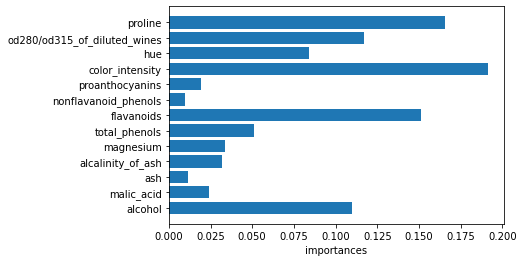

In [14]:
# 중요 변수 시각화
def plot_feature_importances(model):
    x_size = wine.data.shape[1] # 13 : x변수 개수 
    # 가로막대 차트 
    plt.barh(range(x_size), model.feature_importances_) # y, width(x)
    # y 축눈금
    plt.yticks(range(x_size), wine.feature_names) # size, name 
    plt.xlabel("importances")
    plt.show()
# 막대가 가장 높은게 y에 가장 영향을 많이 미치는 변수다
plot_feature_importances(model)